In [40]:
import pandas as pd
import plotly.express as px

In [12]:
# event_data_train.csv
df = pd.read_csv('event_data_train.csv')

In [13]:
df.sample(5)

,step_id,timestamp,action,user_id
3042827,31955,1518706197,passed,8372
1783078,32187,1485335847,viewed,14985
1939270,32927,1489859257,viewed,23973
1959026,31976,1490438477,viewed,18716
523313,32176,1436708703,viewed,9721


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480703 entries, 0 to 3480702
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   step_id    int64 
 1   timestamp  int64 
 2   action     object
 3   user_id    int64 
dtypes: int64(3), object(1)
memory usage: 106.2+ MB


In [42]:
df_new = df.query('action == "passed"')
df_g = df_new.groupby(by=['step_id'], as_index=False).agg({'timestamp': 'min'})
df_g = df_g.merge(df_new, how='inner', on=['step_id','timestamp'])

In [43]:
df_g.sample(2)

,step_id,timestamp,action,user_id
104,33378,1434566475,passed,4762
152,33897,1435350194,passed,1046


In [57]:
df_g['user_id'] = df_g['user_id'].apply(str)

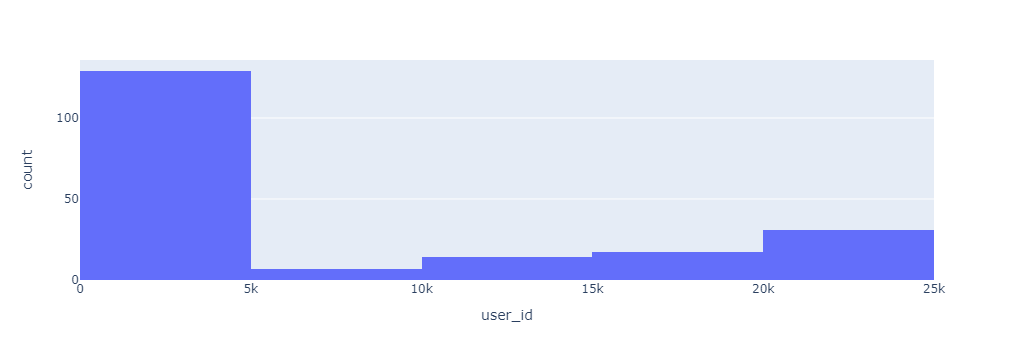

In [69]:
fig = px.histogram(df_g, x='user_id')
fig.show()

In [78]:
class Value:

    def __init__(self):
        self.list = []
        self.num = 0
        self.ct = 0
    
    def __call__(self,num):
        if self.num == num:
            self.ct+=1
        else:
            self.num = num
            self.ct = 1
        if self.ct == 3:
            self.list.append(self.num)
            self.num, self.ct = 0, 0
def consecutive_numbers(logs: pd.DataFrame) -> pd.DataFrame:
    val = Value()
    for i in map(val,logs['num']):
        print(val.list)
        print(val.num)
        print(val.ct)
    return pd.DataFrame({'ConsecutiveNums':val.list})
    
    

In [79]:
data = [[1, 1], [2, 1], [3, 1], [4, 2], [5, 1], [6, 2], [7, 2]]
logs = pd.DataFrame(data, columns=['id', 'num']).astype({'id':'Int64', 'num':'Int64'})
consecutive_numbers(logs)

[]
1
1
[]
1
2
[1]
0
0
[1]
2
1
[1]
1
1
[1]
2
1
[1]
2
2


,ConsecutiveNums
0,1
